# Transformations

Gargeya Sharma - 220278025 - MSc Artificial Intelligence

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# a.)

In [2]:
def ICV_rotate(image, theta1):
    """
    Function to Rotate the image 'image' with angle theta1 in anticlockwise direction
    Arguments
        image: <numpy.ndarray> The image you imported to work on (a Numpy array)
        theta1: <int> The angle (in degrees) in which you wanna rotate the image
    Return
        <numpy.ndarray> The New rotated Image with theta1 Degrees
    """ 
    theta1 = np.deg2rad(theta1)
    x_axis = img_x = image.shape[1]
    y_axis = img_y = image.shape[0]
    
    ## To expand the canvas on which the transformed image will be projected and avoid any pixel cropping, 
    ## we are using a bigger canvas by multiplying the input image's dimensions with 'scale_canvas' variable
    
    new_image = np.ones([int(abs(x_axis*np.sin(theta1)) + abs(y_axis*np.cos(theta1))),
                        int(abs(x_axis*np.cos(theta1)) + abs(y_axis*np.sin(theta1))), 
                        3], dtype=int)*255
    
    x_axis = new_image.shape[1]
    y_axis = new_image.shape[0]


    ## Translation Matrix
    
    matrix_c0 = np.array([[1, 0, -new_image.shape[0]//2],
                        [0, 1, -new_image.shape[1]//2],
                         [0, 0, 1]])
    
    ## Rotation Transformation Matrix
    
    matrix_c = np.array([[np.cos(theta1), np.sin(theta1), 0],
                        [-np.sin(theta1), np.cos(theta1), 0],
                        [0, 0, 1]])
    
    ## Reverse Translation Matrix
    
    r_matrix_c0 = np.array([[1, 0, new_image.shape[0]//2 - (y_axis - img_y)//2],
                        [0, 1, new_image.shape[1]//2 - (x_axis - img_x)//2],
                         [0, 0, 1]])

    
    for y in range(y_axis):
        for x in range(x_axis):
            ## Matrix Mulitplication chain of transformations with pixels of the input image
            result_coordinates = np.matmul(np.matmul(matrix_c.T, matrix_c0), np.array([[y], [x], [1]]))
            assert result_coordinates.shape == (3,1)
            
            ## Reverse Translation to bring the image back to its original coordinates
            result_coordinates = np.round(np.matmul(r_matrix_c0, result_coordinates)).astype(int)
            # print(result_coordinates)
            new_y = result_coordinates[0].item()
            new_x = result_coordinates[1].item()
            
            if (new_y in range(0,image.shape[0])) and (new_x in range(0,image.shape[1])):
                
                ## Transfer of Transformed pixels to new image canvas
                new_image[y, x] = image[new_y, new_x]
            else:
                new_image[y,x] = 200            
    return new_image

In [3]:
def ICV_skew(image, theta2):
    """
    Function to Skew the image 'image' with angle theta2 in clockwise direction along horizontal axis
    Arguments
        image: <numpy.ndarray> The image you imported to work on (a Numpy array)
        theta2: <int> The angle (in degrees) in which you wanna skew the image
    Return
        <numpy.ndarray> The Output Image with theta2 Degrees of horizontal skew
    """ 
    theta2 = np.deg2rad(theta2)
    x_axis = img_x = image.shape[1]
    y_axis = img_y = image.shape[0]
    
    ## To expand the canvas on which the transformed image will be projected and avoid any pixel cropping, 
    ## we are using a bigger canvas by multiplying the input image's dimensions with 'scale_canvas' variable
    
    new_image = np.ones([y_axis, 
                         x_axis + int(y_axis*np.tan(theta2)),
                        3], dtype=int)*255
    
    x_axis = new_image.shape[1]
    y_axis = new_image.shape[0]

    ## Translation Matrix
    
    matrix_c0 = np.array([[1, 0, -new_image.shape[0]//2],
                        [0, 1, -new_image.shape[1]//2],
                         [0, 0, 1]])
    
    ## Rotation Transformation Matrix
    
    matrix_c = np.array([[1, np.sin(theta2), 0],
                        [0, 1, 0],
                        [0, 0, 1]])
    
    ## Reverse Translation Matrix
    
    r_matrix_c0 = np.array([[1, 0, new_image.shape[0]//2 - (y_axis - img_y)//2],
                        [0, 1, new_image.shape[1]//2 - (x_axis - img_x)//2],
                         [0, 0, 1]])

    
    for y in range(y_axis):
        for x in range(x_axis):
            ## Matrix Mulitplication chain of transformations with pixels of the input image
            result_coordinates = np.matmul(np.matmul(matrix_c.T, matrix_c0), np.array([[y], [x], [1]]))
            assert result_coordinates.shape == (3,1)
            
            ## Reverse Translation to bring the image back to its original coordinates
            result_coordinates = np.round(np.matmul(r_matrix_c0, result_coordinates)).astype(int)
            # print(result_coordinates)
            new_y = result_coordinates[0].item()
            new_x = result_coordinates[1].item()
            
            if (new_y in range(0,image.shape[0])) and (new_x in range(0,image.shape[1])):
                
                ## Transfer of Transformed pixels to new image canvas
                new_image[y, x] = image[new_y, new_x]
            else:
                new_image[y,x] = 50            
    return new_image

# b.)

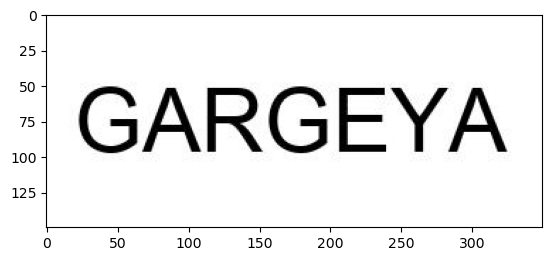

In [4]:
image = plt.imread("../gargeya.jpg")
plt.imshow(image)

In [5]:
image.shape

(150, 350, 3)

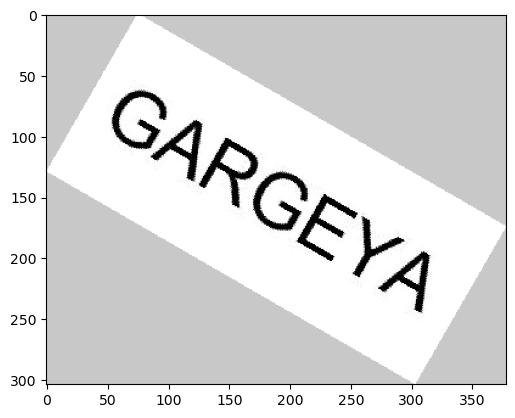

In [6]:
r = ICV_rotate(image, 30)
plt.imshow(r)

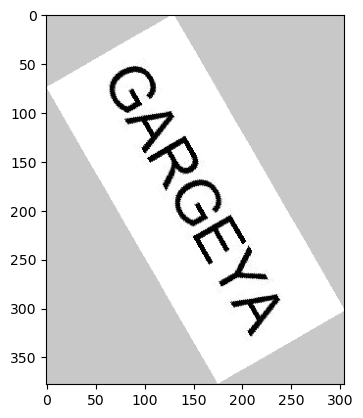

In [7]:
r = ICV_rotate(image, 60)
plt.imshow(r)

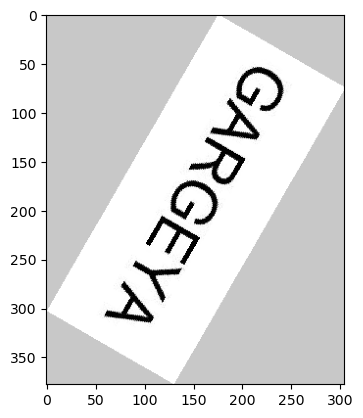

In [8]:
r = ICV_rotate(image, 120)
plt.imshow(r)

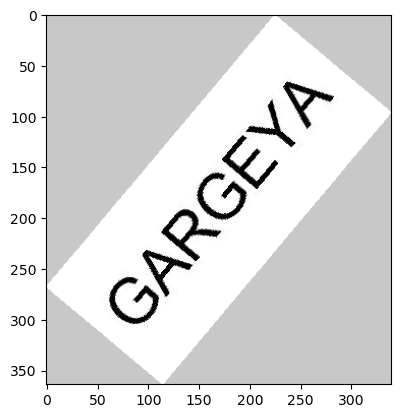

In [9]:
r = ICV_rotate(image, -50)
plt.imshow(r)

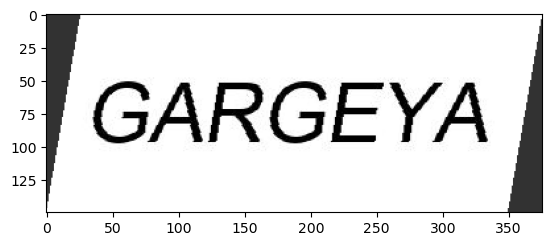

In [10]:
s = ICV_skew(image, 10)
plt.imshow(s)

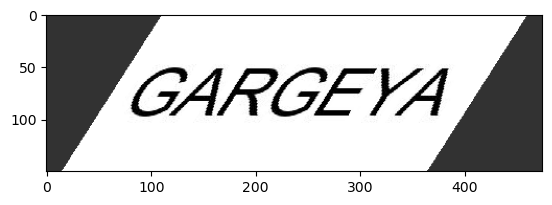

In [11]:
s = ICV_skew(image, 40)
plt.imshow(s)

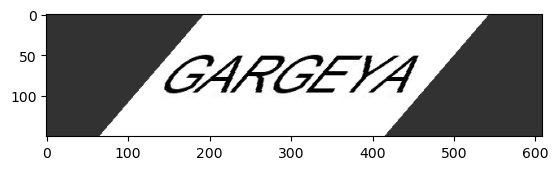

In [12]:
s = ICV_skew(image, 60)
plt.imshow(s)

# c.)

## i.)

Rotate the image by **θ1 = 20** clockwise and then skew the result by **θ2 = 50**.

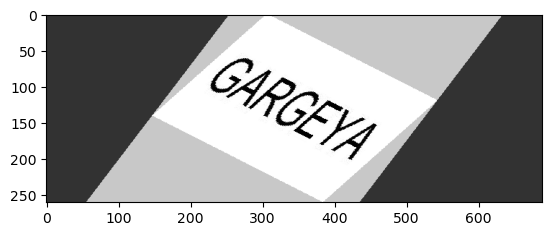

In [13]:
r = ICV_rotate(image, 20)
s = ICV_skew(r, 50)

plt.imshow(s)

## ii.)

Skew the image by **θ2 = 50** and then rotate the result by **θ1 = 20** clockwise.

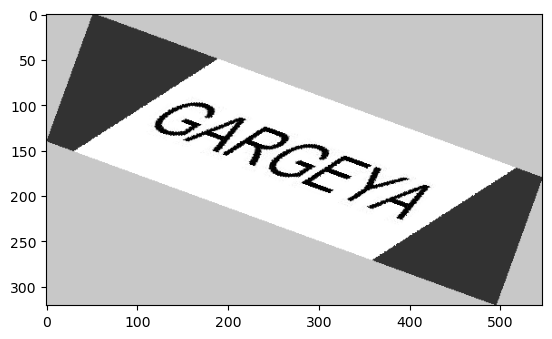

In [14]:
s = ICV_skew(image, 50)
r = ICV_rotate(s, 20)

plt.imshow(r)

### Experimentation (Critical Analysis)

#### Rotation Attempt with forward mapping --> Leading to holes

In [276]:
## ATTEMPT TO TRANSLATE THE ROTATION AXIS TO MID POINT OF THE IMAGE

def rotate(image, theta1, scale=True):
    """
    Function to Rotate the image 'image' with angle theta1 in anticlockwise direction
    Arguments
        image: <numpy.ndarray> The image you imported to work on (a Numpy array)
        theta1: <int> The angle (in degrees) in which you wanna rotate the image
    Return
        <numpy.ndarray> The New rotated Image with theta1 Degrees
    """
        
    x_axis = image.shape[1]
    y_axis = image.shape[0]
    
    ## To expand the canvas on which the transformed image will be projected and avoid any pixel cropping, 
    ## we are using a bigger canvas by multiplying the input image's dimensions with 'scale_canvas' variable
    
    scale_canvas = [(y_axis/x_axis)+1, (x_axis/y_axis)+1] if scale == True else [1,1]
    new_image = np.ones((int(y_axis*scale_canvas[1]), int(x_axis*scale_canvas[0]), image.shape[2]), dtype=int)*255
    
    print(new_image.shape)
    
    ## Translation Matrix
    
    matrix_c0 = np.array([[1, 0, -y_axis//2],
                        [0, 1, -x_axis//2],
                         [0, 0, 1]])
    
    ## Rotation Transformation Matrix
    
    matrix_c = np.array([[np.cos(np.deg2rad(theta1)), -np.sin(np.deg2rad(theta1)), 0],
                        [np.sin(np.deg2rad(theta1)), np.cos(np.deg2rad(theta1)), 0],
                        [0, 0, 1]])
    
    ## Reverse Translation Matrix
    
    r_matrix_c0 = np.array([[1, 0, new_image.shape[0]//2],
                        [0, 1, new_image.shape[1]//2],
                         [0, 0, 1]])

    
    for y in range(y_axis):
        for x in range(x_axis):
            ## Matrix Mulitplication chain of transformations with pixels of the input image
            result_coordinates = np.matmul(np.matmul(matrix_c.T, matrix_c0), np.array([[y], [x], [1]]))
            assert result_coordinates.shape == (3,1)
            
            ## Reverse Translation to bring the image back to its original coordinates
            result_coordinates = np.matmul(r_matrix_c0, result_coordinates)
            
            ## Bounding conditions to prevent transformed pixels to go 'out of bounds' from the new image canvas
            if abs(result_coordinates[1].item()) >= new_image.shape[1]: result_coordinates[1] = new_image.shape[1]-1
            if abs(result_coordinates[0].item()) >= new_image.shape[0]: result_coordinates[0] = new_image.shape[0]-1
            
            ## Transfer of Transformed pixels to new image canvas
            new_image[int(result_coordinates[0].item()), int(result_coordinates[1].item())] = image[y,x]
            
    return new_image

In [280]:
result  = rotate(image, 10)
plt.imshow(result)

(400, 400, 3)


In [54]:
result  = rotate(image, 30)
plt.imshow(result)

In [40]:
result  = rotate(image, 90)
plt.imshow(result)

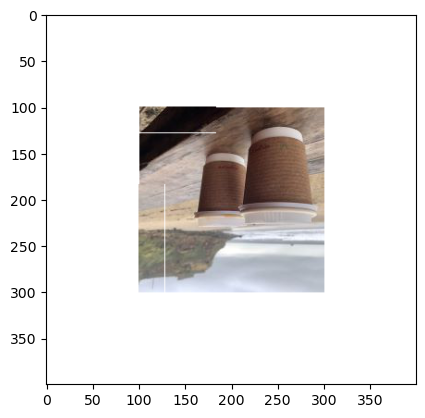

In [41]:
result  = rotate(image, 180)
plt.imshow(result)

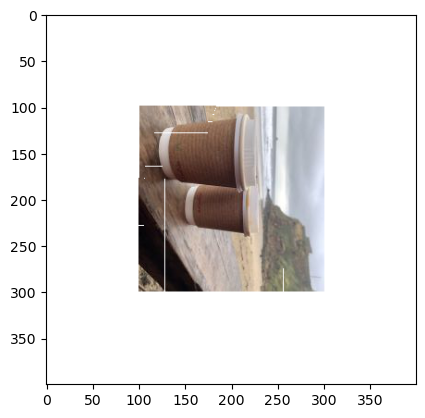

In [42]:
result  = rotate(image, 270)
plt.imshow(result)

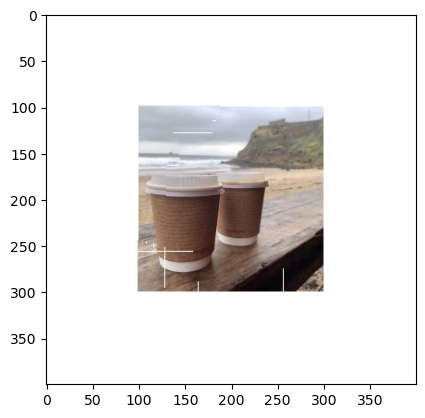

In [43]:
result  = rotate(image, 360)
plt.imshow(result)

#### Skew Attempt with hard-coded canvas size --> Not desirable with corner to corner transformed image fitting

In [281]:
def skew(image, theta2, scale=True):
    """
    Function to Rotate the image 'image' with angle theta1 in anticlockwise direction
    Arguments
        image: <numpy.ndarray> The image you imported to work on (a Numpy array)
        theta1: <int> The angle (in degrees) in which you wanna rotate the image
    Return
        <numpy.ndarray> The New rotated Image with theta1 Degrees
    """
        
    x_axis = image.shape[1]
    y_axis = image.shape[0]
    
    ## To expand the canvas on which the transformed image will be projected and avoid any pixel cropping, 
    ## we are using a bigger canvas by multiplying the input image's dimensions with 'scale_canvas' variable
    
    scale_canvas = [(y_axis/x_axis)+1, (x_axis/y_axis)+1] if scale == True else [1,1]
    new_image = np.ones((int(y_axis*scale_canvas[1]), int(x_axis*scale_canvas[0]), image.shape[2]), dtype=int)*255
    
    ## Translation Matrix
    
    matrix_c0 = np.array([[1, 0, -y_axis//2],
                        [0, 1, -x_axis//2],
                         [0, 0, 1]])
    
    ## Skewing Matrix
    matrix_c = np.array([[1, np.sin(np.deg2rad(theta2)), 0],\
                        [0, 1, 0],
                        [0, 0, 1]])
    
    ## Reverse Translation Matrix
    
    r_matrix_c0 = np.array([[1, 0, new_image.shape[0]//2],
                        [0, 1, new_image.shape[1]//2],
                         [0, 0, 1]])

    
    for y in range(y_axis):
        for x in range(x_axis):
            ## Matrix Mulitplication chain of transformations with pixels of the input image
            result_coordinates = np.matmul(np.matmul(matrix_c.T, matrix_c0), np.array([[y], [x], [1]]))
            assert result_coordinates.shape == (3,1)
            
            ## Reverse Translation to bring the image back to its original coordinates
            result_coordinates = np.matmul(r_matrix_c0, result_coordinates)
            
            ## Bounding conditions to prevent transformed pixels to go 'out of bounds' from the new image canvas
            if abs(result_coordinates[1].item()) >= new_image.shape[1]: result_coordinates[1] = new_image.shape[1]-1
            if abs(result_coordinates[0].item()) >= new_image.shape[0]: result_coordinates[0] = new_image.shape[0]-1
            
            ## Transfer of Transformed pixels to new image canvas
            new_image[int(result_coordinates[0].item()), int(result_coordinates[1].item())] = image[y,x]
            
    return new_image

In [283]:
result = skew(image, 20)
plt.imshow(result)

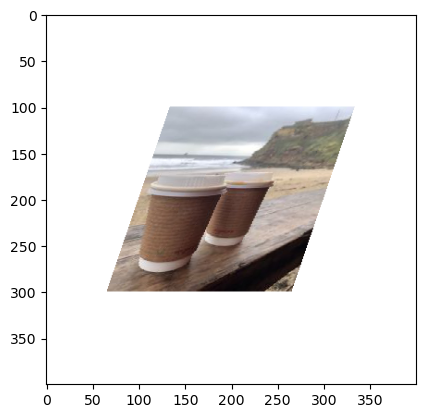

In [284]:
result = skew(image, -20)
plt.imshow(result)

#### Rotating and Skewing within a single function --> Not the best approach for Questions of this task. Forward mapping is not properly functional


In [41]:
def rotate_skew(image, theta1, theta2, clockwise=False, big_canvas=True, first_skew=False):

    """
    Function to Rotate the image 'image' with angle 'theta1' in anticlockwise direction and then skew the rotated image with angle 'theta2'
    Arguments
        image: <numpy.ndarray> The image you imported to work on (a Numpy array)
        theta1: <int> The angle (in degrees) in which you wanna rotate the image
        theta2: <int> The angle (in degrees) in which you wanna skew the image horizontally
    Return
        <numpy.ndarray> The New skewed rotated Image with theta2 and theta1 Degrees respectively
    """
    
    # print(image.shape)
    x_axis = image.shape[1]
    y_axis = image.shape[0]
    
    if big_canvas == True:
        canvas_scale_factor = 2
    else:
        canvas_scale_factor = 1
        
    new_image = np.ones([y_axis*canvas_scale_factor, x_axis*canvas_scale_factor, 3], dtype=int)*255   
    
    ## Translation Matrix
    
    matrix_c0 = np.array([[1, 0, -y_axis//2],\
                        [0, 1, -x_axis//2],
                         [0, 0, 1]])
    
    ## Rotation Matrix
    
    if clockwise:
        matrix_c = np.array([[np.cos(np.deg2rad(theta1)), np.sin(np.deg2rad(theta1)), 0],\
                            [-np.sin(np.deg2rad(theta1)), np.cos(np.deg2rad(theta1)), 0],
                            [0, 0, 1]])
    else:
        matrix_c = np.array([[np.cos(np.deg2rad(theta1)),-np.sin(np.deg2rad(theta1)), 0],\
                            [np.sin(np.deg2rad(theta1)), np.cos(np.deg2rad(theta1)), 0],
                            [0, 0, 1]])
        
    ## Skewing Matrix
    
    matrix_c1 = np.array([[1, 0, 0],\
                        [np.sin(np.deg2rad(theta2)), 1, 0],
                         [0, 0, 1]])
    
    ## Reverse Translation Matrix
    
    r_matrix_c0 = np.array([[1, 0, +y_axis//2],\
                        [0, 1, +x_axis//2],
                         [0, 0, 1]])
    
    for y in range(y_axis):
        for x in range(x_axis):
            if first_skew:
                result_coordinates = np.matmul(np.matmul(np.matmul(matrix_c0.T, matrix_c1), matrix_c.T), np.array([[y], [x], [1]]))
            else:
                result_coordinates = np.matmul(np.matmul(np.matmul(matrix_c0.T, matrix_c), matrix_c1.T), np.array([[y], [x], [1]]))
            assert result_coordinates.shape == (3,1)
            
            ## Reverse Translation to bring the coordinates on their original position
            if big_canvas:
                result_coordinates = np.matmul(r_matrix_c0.T, result_coordinates) + [[-y_axis//canvas_scale_factor], [x_axis//(canvas_scale_factor*2)], [0]]
            else:
                result_coordinates = np.matmul(r_matrix_c0.T, result_coordinates)
            
            if (int(result_coordinates[1].item()) >= new_image.shape[1]): result_coordinates[1] = new_image.shape[1]-1
            if (int(result_coordinates[0].item()) >= new_image.shape[0]): result_coordinates[0] = new_image.shape[0]-1
            
            new_image[int(result_coordinates[0].item()), int(result_coordinates[1].item())] = image[y,x]
    return new_image

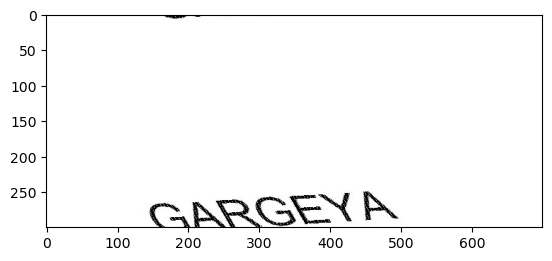

In [43]:
result = rotate_skew(image, 30, 30)
plt.imshow(result)

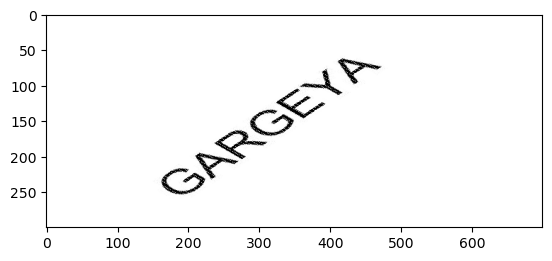

In [44]:
result = rotate_skew(image, 60, 30)
plt.imshow(result)